In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler

# Load dataset
file_path = "/content/processed_crypto_data_corrected.csv"
df = pd.read_csv(file_path)
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Function to prepare multivariate dataset for LSTM
def prepare_multivariate_data(df, crypto, n_steps=10):
    crypto_df = df[df['Crypto'] == crypto].sort_values(by='Timestamp')
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(crypto_df[['Close', 'VWAP', 'Volume', 'Volatility', 'RSI', 'MACD', 'MA_7', 'MA_14']])

    X, y = [], []
    for i in range(len(scaled_data) - n_steps):
        X.append(scaled_data[i:i+n_steps])
        y.append(scaled_data[i+n_steps, 0])  # Predict 'Close' price

    return np.array(X), np.array(y), scaler, crypto_df.reset_index(drop=True)


In [ ]:
# Function to build LSTM model
def build_multivariate_lstm_model(input_shape):
    model = Sequential([
        LSTM(100, return_sequences=True, input_shape=input_shape),
        Dropout(0.3),
        LSTM(100, return_sequences=False),
        Dropout(0.3),
        Dense(50),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

Epoch 1/25


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 6s 54ms/step - loss: 0.0192 - val_loss: 0.0056
Epoch 2/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0038 - val_loss: 0.0076
Epoch 3/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0025 - val_loss: 0.0041
Epoch 4/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0017 - val_loss: 0.0028
Epoch 5/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0022 - val_loss: 0.0101
Epoch 6/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0019 - val_loss: 0.0048
Epoch 7/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0022 - val_loss: 0.0045
Epoch 8/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0015 - val_loss: 0.0038
Epoch 9/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0018 - val_loss: 0.0031
Epoch 10/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0015 - val_loss: 0.0125
Epoch 11/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0013 - val_loss: 0.0064
Epoch 12/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0016 - val_l

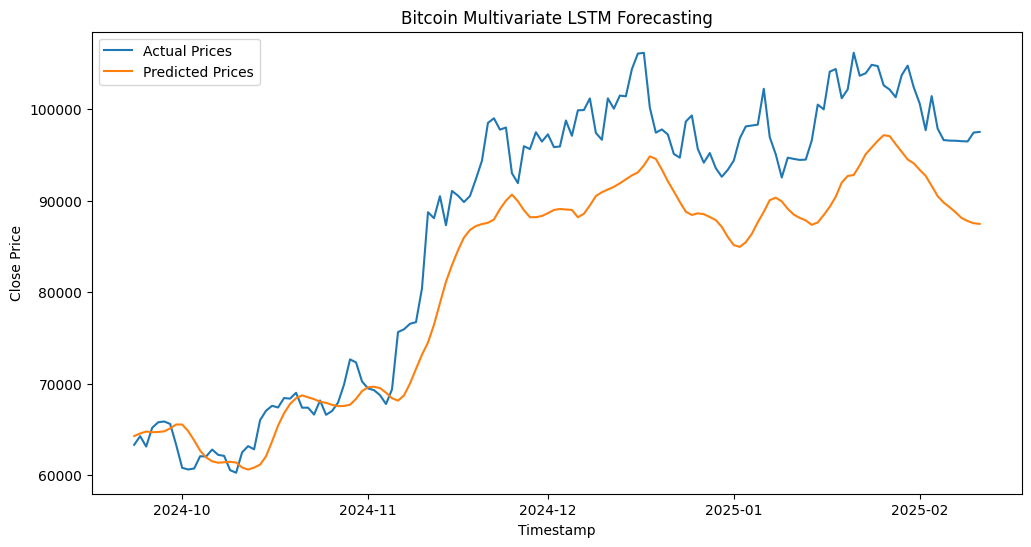

Epoch 1/25


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - loss: 0.0169 - val_loss: 0.0133
Epoch 2/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0024 - val_loss: 0.0146
Epoch 3/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0020 - val_loss: 0.0156
Epoch 4/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0018 - val_loss: 0.0101
Epoch 5/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0016 - val_loss: 0.0142
Epoch 6/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0016 - val_loss: 0.0226
Epoch 7/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0013 - val_loss: 0.0116
Epoch 8/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0013 - val_loss: 0.0124
Epoch 9/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0012 - val_loss: 0.0181
Epoch 10/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0014 - val_loss: 0.0085
Epoch 11/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0016 - val_loss: 0.0087
Epoch 12/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0011 - val_l

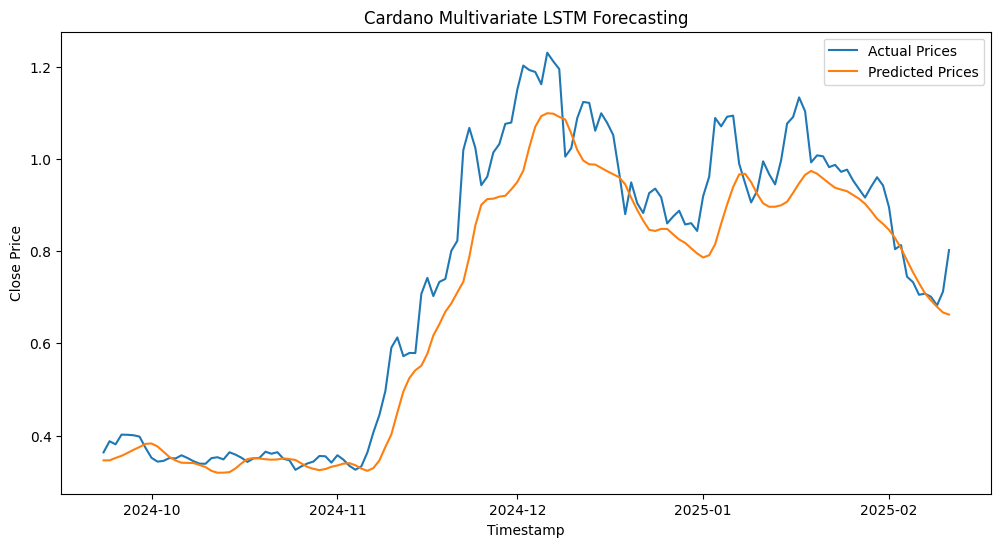

Epoch 1/25


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - loss: 0.0546 - val_loss: 0.0126
Epoch 2/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0059 - val_loss: 0.0099
Epoch 3/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0034 - val_loss: 0.0103
Epoch 4/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0028 - val_loss: 0.0101
Epoch 5/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0032 - val_loss: 0.0126
Epoch 6/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0025 - val_loss: 0.0107
Epoch 7/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0022 - val_loss: 0.0132
Epoch 8/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0021 - val_loss: 0.0090
Epoch 9/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0026 - val_loss: 0.0082
Epoch 10/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0022 - val_loss: 0.0097
Epoch 11/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0020 - val_loss: 0.0094
Epoch 12/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0021 - val_l

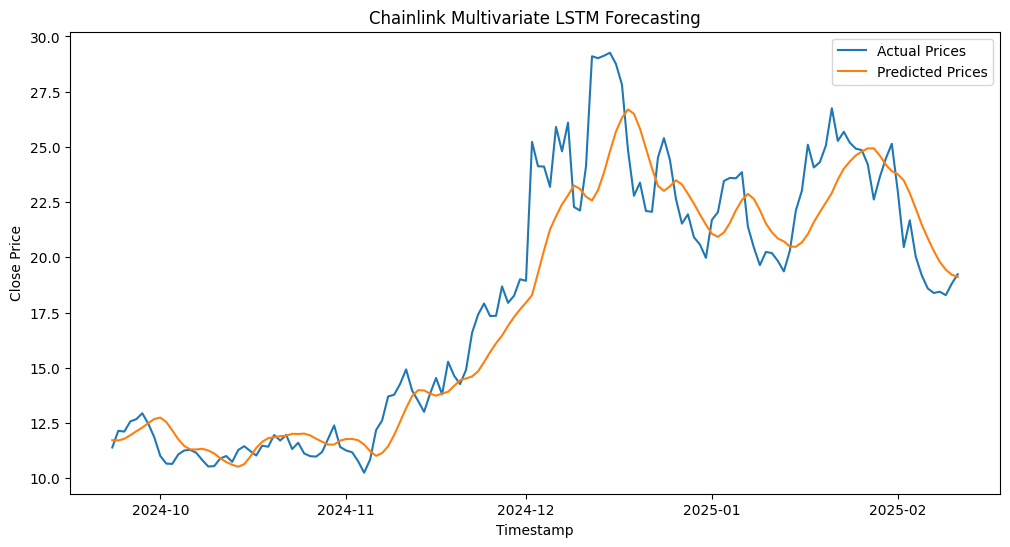

Epoch 1/25


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 66ms/step - loss: 0.0057 - val_loss: 0.0366
Epoch 2/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0013 - val_loss: 0.0153
Epoch 3/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 8.3260e-04 - val_loss: 0.0130
Epoch 4/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0010 - val_loss: 0.0206
Epoch 5/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 6.8462e-04 - val_loss: 0.0201
Epoch 6/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 7.8249e-04 - val_loss: 0.0234
Epoch 7/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 6.4608e-04 - val_loss: 0.0156
Epoch 8/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 7.5247e-04 - val_loss: 0.0233
Epoch 9/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 6.9713e-04 - val_loss: 0.0352
Epoch 10/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 6.7006e-04 - val_loss: 0.0172
Epoch 11/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 5.8461e-04 - val_loss: 0.0253
Epoch 12/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 

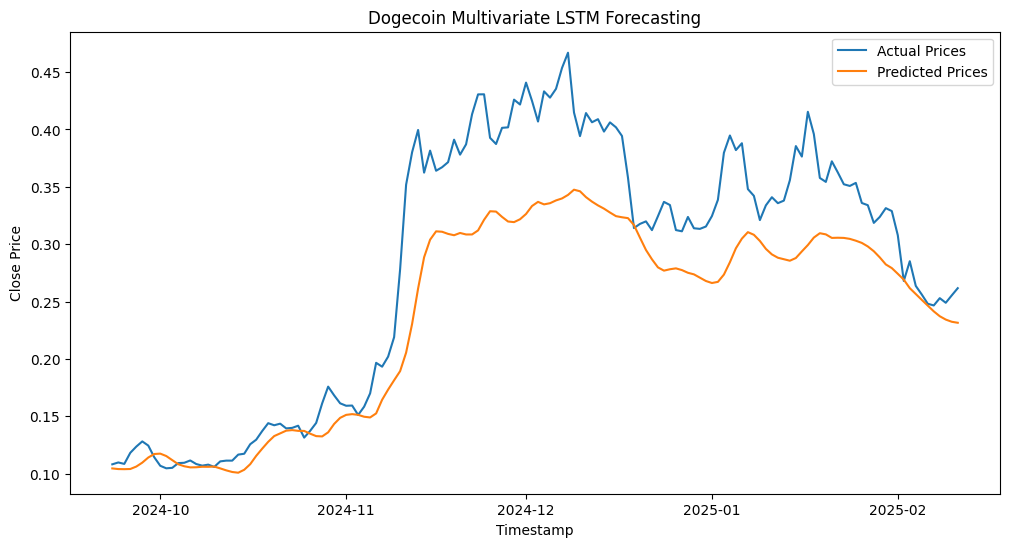

Epoch 1/25


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 6s 54ms/step - loss: 0.0743 - val_loss: 0.0098
Epoch 2/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0076 - val_loss: 0.0082
Epoch 3/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0074 - val_loss: 0.0079
Epoch 4/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0062 - val_loss: 0.0086
Epoch 5/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0059 - val_loss: 0.0064
Epoch 6/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0057 - val_loss: 0.0059
Epoch 7/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0053 - val_loss: 0.0065
Epoch 8/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0042 - val_loss: 0.0086
Epoch 9/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0055 - val_loss: 0.0061
Epoch 10/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0041 - val_loss: 0.0060
Epoch 11/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0050 - val_loss: 0.0067
Epoch 12/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0054 - val_l

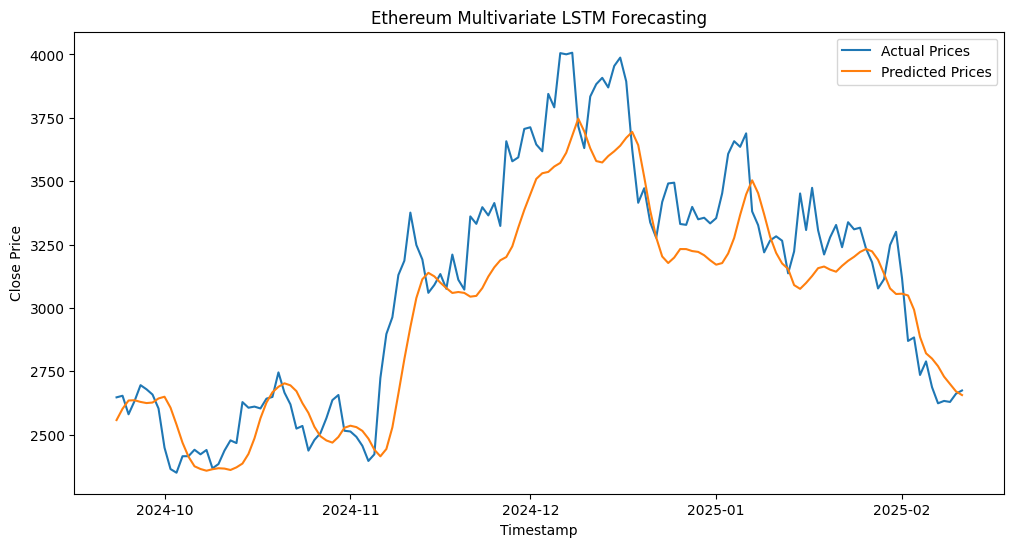

Epoch 1/25


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step - loss: 0.0271 - val_loss: 0.0142
Epoch 2/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0076 - val_loss: 0.0205
Epoch 3/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0052 - val_loss: 0.0160
Epoch 4/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0049 - val_loss: 0.0137
Epoch 5/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0042 - val_loss: 0.0171
Epoch 6/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0047 - val_loss: 0.0132
Epoch 7/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0042 - val_loss: 0.0186
Epoch 8/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0043 - val_loss: 0.0110
Epoch 9/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0041 - val_loss: 0.0141
Epoch 10/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0039 - val_loss: 0.0178
Epoch 11/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0042 - val_loss: 0.0140
Epoch 12/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0036 - val_l

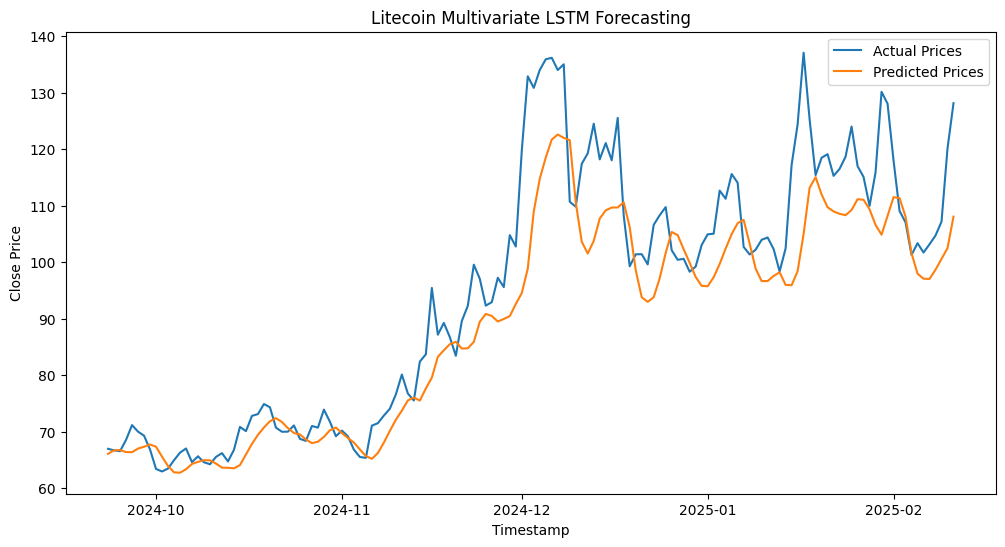

Epoch 1/25


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - loss: 0.0497 - val_loss: 0.0201
Epoch 2/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0109 - val_loss: 0.0135
Epoch 3/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0058 - val_loss: 0.0105
Epoch 4/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0048 - val_loss: 0.0089
Epoch 5/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0044 - val_loss: 0.0087
Epoch 6/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0040 - val_loss: 0.0083
Epoch 7/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0044 - val_loss: 0.0083
Epoch 8/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0034 - val_loss: 0.0080
Epoch 9/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0037 - val_loss: 0.0081
Epoch 10/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0044 - val_loss: 0.0077
Epoch 11/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0035 - val_loss: 0.0076
Epoch 12/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0033 - val_l

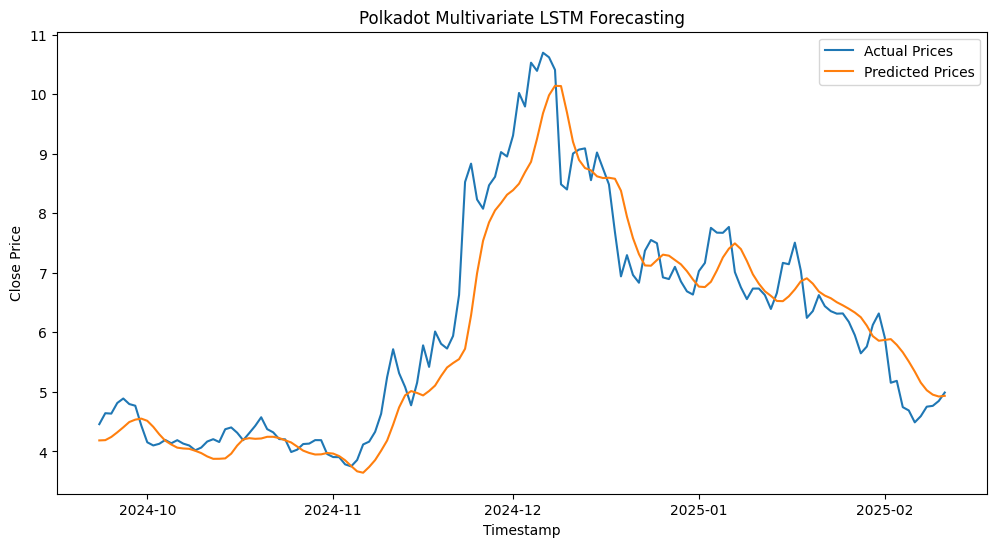

Epoch 1/25


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 6s 67ms/step - loss: 0.1102 - val_loss: 0.0042
Epoch 2/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0088 - val_loss: 0.0037
Epoch 3/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0058 - val_loss: 0.0031
Epoch 4/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0057 - val_loss: 0.0024
Epoch 5/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0046 - val_loss: 0.0021
Epoch 6/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0046 - val_loss: 0.0022
Epoch 7/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0052 - val_loss: 0.0020
Epoch 8/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0044 - val_loss: 0.0020
Epoch 9/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0038 - val_loss: 0.0027
Epoch 10/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0041 - val_loss: 0.0026
Epoch 11/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0042 - val_loss: 0.0020
Epoch 12/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0038 - val_l

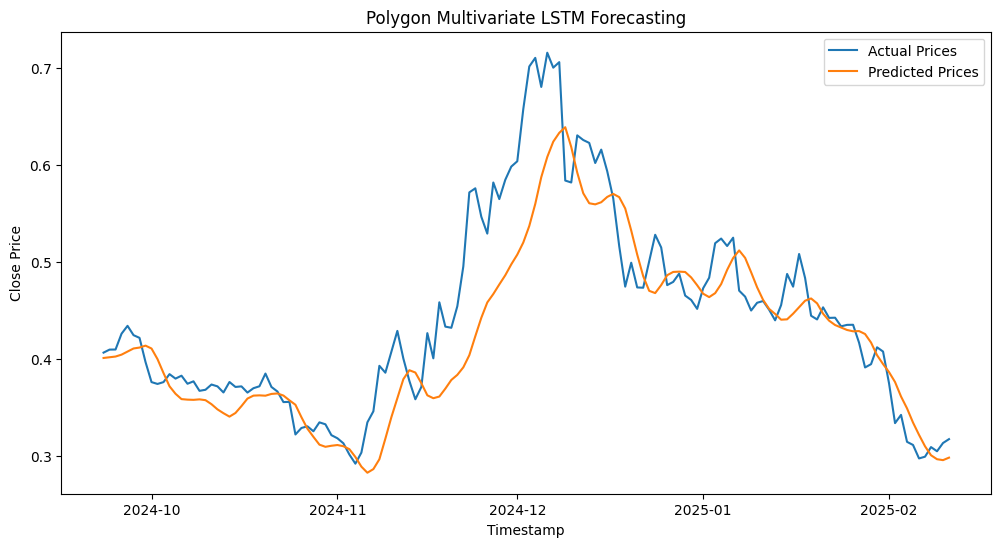

Epoch 1/25


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - loss: 0.0019 - val_loss: 0.1510
Epoch 2/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 4.7498e-04 - val_loss: 0.0656
Epoch 3/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 3.4569e-04 - val_loss: 0.0437
Epoch 4/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 2.4033e-04 - val_loss: 0.0390
Epoch 5/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 2.2271e-04 - val_loss: 0.0359
Epoch 6/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 1.5908e-04 - val_loss: 0.0316
Epoch 7/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 1.9317e-04 - val_loss: 0.0268
Epoch 8/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 2.0077e-04 - val_loss: 0.0286
Epoch 9/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 1.5085e-04 - val_loss: 0.0358
Epoch 10/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 2.1392e-04 - val_loss: 0.0318
Epoch 11/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 1.6750e-04 - val_loss: 0.0335
Epoch 12/25
18/18 ━━━━━━━━━━━━━━━━

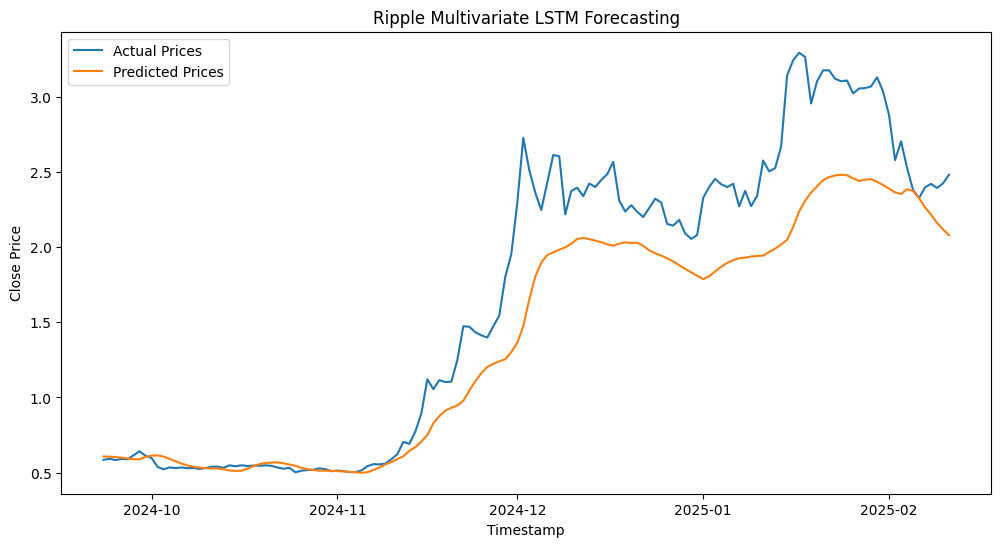

Epoch 1/25


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step - loss: 0.0598 - val_loss: 0.0093
Epoch 2/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0067 - val_loss: 0.0058
Epoch 3/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0036 - val_loss: 0.0061
Epoch 4/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0031 - val_loss: 0.0089
Epoch 5/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0030 - val_loss: 0.0079
Epoch 6/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0025 - val_loss: 0.0168
Epoch 7/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0028 - val_loss: 0.0053
Epoch 8/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0023 - val_loss: 0.0089
Epoch 9/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0026 - val_loss: 0.0052
Epoch 10/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0027 - val_loss: 0.0053
Epoch 11/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0023 - val_loss: 0.0138
Epoch 12/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0025 - val_l

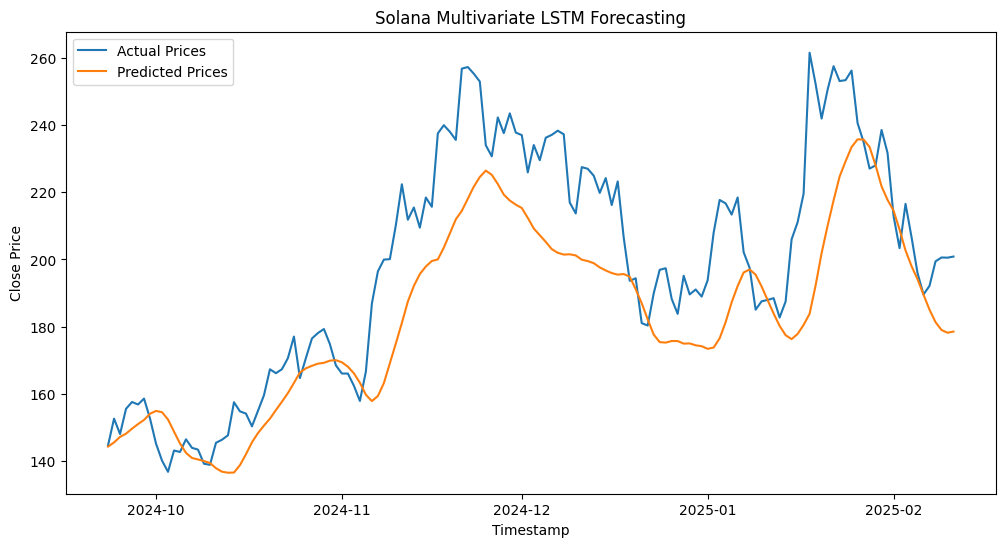

In [ ]:
# Train and test LSTM for multiple cryptocurrencies
cryptos = df['Crypto'].unique()[:10]  # Select first 10 cryptos
results = {}

for crypto in cryptos:
    X, y, scaler, crypto_df = prepare_multivariate_data(df, crypto)
    train_size = int(len(X) * 0.8)
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]

    model = build_multivariate_lstm_model((X_train.shape[1], X_train.shape[2]))
    model.fit(X_train, y_train, epochs=25, batch_size=32, validation_data=(X_test, y_test), verbose=1)

    results[crypto] = model.evaluate(X_test, y_test)
    print(f"{crypto} Model Test Loss: {results[crypto]}")

# Forecasting
    predictions = model.predict(X_test)
    predictions = scaler.inverse_transform(np.hstack((predictions, np.zeros((predictions.shape[0], 7)))))[:, 0]
    actual_prices = scaler.inverse_transform(np.hstack((y_test.reshape(-1, 1), np.zeros((y_test.shape[0], 7)))))[:, 0]

# Compute R2 Score
    r2 = r2_score(actual_prices, predictions)
    print(f"{crypto} R2 Score: {r2}")

    # Compute confidence interval (simple standard deviation method)
    error = np.abs(predictions - actual_prices)
    std_dev = np.std(error)
    lower_bound = predictions - std_dev
    upper_bound = predictions + std_dev

# Visualization
    plt.figure(figsize=(12, 6))
    plt.plot(crypto_df['Timestamp'].iloc[train_size + 10:train_size + 10 + len(actual_prices)], actual_prices, label='Actual Prices')
    plt.plot(crypto_df['Timestamp'].iloc[train_size + 10:train_size + 10 + len(predictions)], predictions, label='Predicted Prices')
    plt.xlabel('Timestamp')
    plt.ylabel('Close Price')
    plt.title(f'{crypto} Multivariate LSTM Forecasting')
    plt.legend()
    plt.show()
